## 新闻分类 多分类问题    
    本节使用路透社数据集，它包含许多短新闻及其对应的主题，由路透社在 1986 年发布。它是一个简单的、广泛使用的文本分类数据集。
    它包括 46 个不同的主题：某些主题的样本更多,但训练集中每个主题都有至少 10 个样本。与 IMDB 和 MNIST 类似，路透社数据集也内置为 Keras 的一部分
    训练数据为8982，测试数据为2246

### 1 加载数据查看数据信息 

In [6]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
train_length = train_data.shape
test_length = test_data.shape

In [6]:
data_len_info = "train:{train}  test:{test}".format(train=train_length,test=test_length)
data_len_info

"train:(8982,)'n test:(2246,)"

### 2 编码数据（将数据转换成张量）

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [8]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [10]:
X_train.shape

(8982, 10000)

In [11]:
y_train.shape

(8982, 46)

In [12]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 3 构建网络
    这个主题分类问题与前面的电影评论分类问题（二分类）类似，两个例子都是试图对简短的文本片段进行分类。但这个问题有一个新的约束条件：
    输出类别的数量从 2 个变为 46 个.输出空间的维度要大得多。对于前面用过的 Dense 层的堆叠，每层只能访问上一层输出的信息。
    如果某一层丢失了与分类问题相关的一些信息，那么这些信息无法被后面的层找回，也 就是说，每一层都可能成为信息瓶颈。上一个例子使用了 16 维的中间层，
    但对这个例子来说 16 维空间可能太小了，无法学会区分 46 个不同的类别。这种维度较小的层可能成为信息 瓶颈，永久地丢失相关信息。出于这个原因，
    下面将使用维度更大的层，包含 64 个单元。

#### 注意点。
 - 网络的最后一层是大小为 46 的 Dense 层。这意味着，对于每个输入样本，网络都会输
   出一个 46 维向量。这个向量的每个元素（即每个维度）代表不同的输出类别。
 - 最后一层使用了 softmax 激活。网络将输出在 46
个不同输出类别上的概率分布——对于每一个输入样本，网络都会输出一个 46 维向量，
其中 output[i] 是样本属于第 i 个类别的概率。46 个概率的总和为 1。
对于这个例子，最好的损失函数是 categorical_crossentropy（分类交叉熵）。它用于
衡量两个概率分布之间的距离，这里两个概率分布分别是网络输出的概率分布和标签的真实分
布。通过将这两个分布的距离最小化，训练网络可使输出结果尽可能接近真实标签。

In [3]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### 4 编译模型

In [19]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

### 5 数据分为训练数据和验证数据

In [9]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [20]:
# 训练网络
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

W0830 11:50:15.144608 139842927757120 deprecation.py:323] From /home/admin/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0830 11:50:15.232175 139842927757120 deprecation_wrapper.py:119] From /home/admin/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 459us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 3s 341us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 3s 343us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 3s 337us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 3s 345us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 3s 333us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 3s 333us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9108 - val_acc: 0.8030


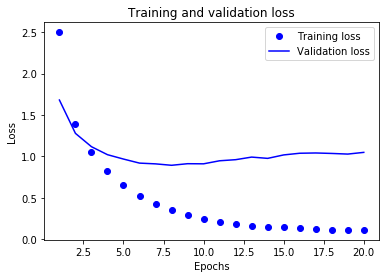

In [22]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

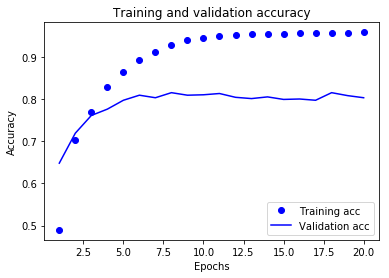

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 6 重新训练网络 9轮次

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 495us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 3s 403us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 3s 387us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 3s 386us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 3s 391us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 3s 401us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 3s 380us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [25]:
results

[1.022498280048795, 0.7756010686194165]

### 7 在新数据上生成预测结果

In [48]:
predictions = model.predict(X_test)

In [50]:
predictions.shape

(2246, 46)

In [53]:
np.argmax(predictions[0])

3

In [56]:
np.sum(predictions[0])

1.0

In [58]:
y_= np.array(train_labels)

In [59]:
y_

array([ 3,  4,  3, ..., 25,  3, 25])

### 8 中间层维度足够大的重要性
    前面提到，最终输出是 46 维的，因此中间层的隐藏单元个数不应该比 46 小太多。现在来
    看一下，如果中间层的维度远远小于 46（比如 4 维），造成了信息瓶颈，那么会发生什么？

In [10]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(4, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model1.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))

W0830 12:18:23.505135 140601229653824 deprecation.py:323] From /home/admin/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0830 12:18:23.586190 140601229653824 deprecation_wrapper.py:119] From /home/admin/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 925us/step - loss: 2.7629 - acc: 0.4734 - val_loss: 1.9887 - val_acc: 0.6020
Epoch 2/20
7982/7982 [==============================] - 6s 786us/step - loss: 1.6327 - acc: 0.6339 - val_loss: 1.5277 - val_acc: 0.6380
Epoch 3/20
7982/7982 [==============================] - 6s 801us/step - loss: 1.3069 - acc: 0.6894 - val_loss: 1.3917 - val_acc: 0.6600
Epoch 4/20
7982/7982 [==============================] - 6s 813us/step - loss: 1.1489 - acc: 0.7223 - val_loss: 1.3313 - val_acc: 0.6760
Epoch 5/20
7982/7982 [==============================] - 7s 817us/step - loss: 1.0327 - acc: 0.7479 - val_loss: 1.3140 - val_acc: 0.6850
Epoch 6/20
7982/7982 [==============================] - 6s 803us/step - loss: 0.9385 - acc: 0.7707 - val_loss: 1.2850 - val_acc: 0.7020
Epoch 7/20
7982/7982 [==============================] - 6s 813us/step - loss: 0.8509 - acc: 0.7909 - val_loss: 1.2912 - val_acc: 0.6990


    现在网络的验证精度最大约为 71%，比前面下降了 8%。导致这一下降的主要原因在于，我们试图将大量信息（这些信息足够恢复 46 个类别的分割超平面）压缩到维度很小的中间空间
    网络能够将大部分必要信息塞入这个四维表示中，但并不是全部信息。

### 总结。
- 如果要对 N 个类别的数据点进行分类，网络的最后一层应该是大小为 N 的 Dense 层。
- 对于单标签、多分类问题，网络的最后一层应该使用 softmax 激活，这样可以输出在 N
个输出类别上的概率分布。
- 这种问题的损失函数几乎总是应该使用分类交叉熵。它将网络输出的概率分布与目标的
真实分布之间的距离最小化。
- 处理多分类问题的标签有两种方法。
    - 通过分类编码（也叫 one-hot 编码）对标签进行编码，然后使用 categorical_
crossentropy 作为损失函数。
    - 将标签编码为整数，然后使用 sparse_categorical_crossentropy 损失函数。
- 如果你需要将数据划分到许多类别中，应该避免使用太小的中间层，以免在网络中造成
信息瓶颈。